In [1]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:/Users/cyb/ipnb/haha/280_Ben_八大直播八大案例配套课件/第三章/HW5/')

In [3]:
con = sqlite3.connect(':memory:')

In [4]:
# 读取 excel 文件
card = pd.read_csv('card.csv', encoding='gbk')
disp = pd.read_csv('disp.csv', encoding='gbk')
clients = pd.read_csv('clients.csv', encoding='gbk')
# 存入数据库
card.to_sql('card', con)
disp.to_sql('disp', con)
clients.to_sql('clients', con)

In [5]:
card.columns

Index(['card_id', 'disp_id', 'issued', 'type'], dtype='object')

In [6]:
car_sql = '''
select a.*, c.sex, c.birth_date, c.district_id
from card a
left join disp b on a.disp_id=b.disp_id
left join clients c on b.client_id=c.client_id
where b.type='所有者'
'''
card_t = pd.read_sql(car_sql, con)

In [7]:
card_t.head()

,index,card_id,disp_id,issued,type,sex,birth_date,district_id
0,0,1005,9285,1993-11-07,普通卡,女,1968-01-28,74
1,1,104,588,1994-01-19,普通卡,女,1960-10-20,61
2,2,747,4915,1994-02-05,普通卡,男,1963-07-19,40
3,3,70,439,1994-02-08,普通卡,女,1968-09-12,51
4,4,577,3687,1994-02-15,普通卡,男,1972-02-06,49


In [8]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [9]:
from datetime import *
card_t['issued_date'] = pd.to_datetime(card_t['issued'])
card_t['issued_year'] = card_t['issued_date'].map(lambda x: x.year)

1. 不同类型卡的持卡人的性别对比
2. 不同类型卡的持卡人在办卡时的平均年龄对比
3. 不同类型卡的持卡人在办卡前一年内的平均帐户余额对比
4. 不同类型卡的持卡人在办卡前一年内的平均收入对比

### 不同卡的分布 
 - 时间 + 分类变量

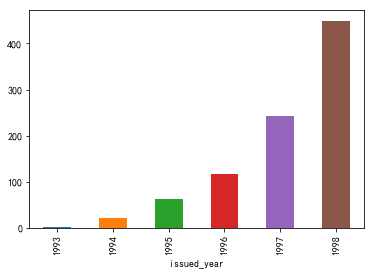

In [10]:
card_t.card_id.groupby(card_t['issued_year']).count().plot(kind='bar')# 年变化趋势，但是看不出各种卡的占比情况

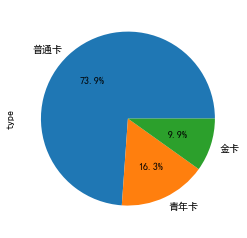

In [11]:
card_t.type.value_counts().plot(kind='pie', autopct='%.1f%%')# 饼形图看到卡的占比，但是看不出年变化趋势

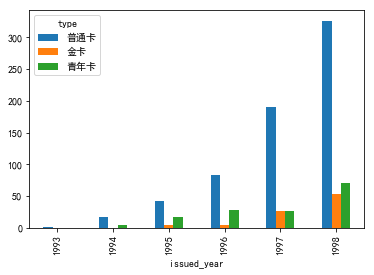

In [12]:
pd.crosstab(card_t.issued_year, card_t.type).plot(kind='bar')# 为了同时兼顾两者，使用柱形图，普通的柱形图看不出占比

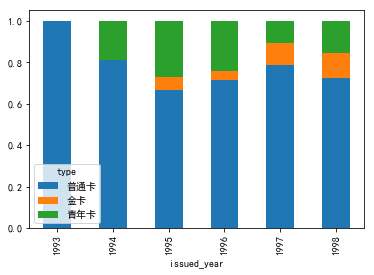

In [13]:
t1 = pd.crosstab(card_t.issued_year, card_t.type)
t1['sum1'] = t1.sum(1)
t2 = t1.div(t1['sum1'], axis=0)
t2.drop('sum1', 1).plot(kind='bar', stacked=True)# 堆叠柱形图，可以看出占比

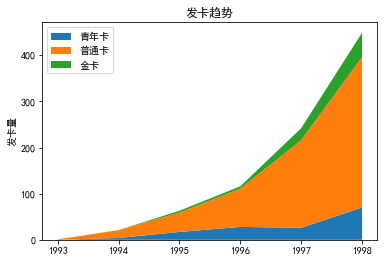

In [14]:
labels=["青年卡","普通卡","金卡"]
y1=t1.loc[:,"青年卡"].astype('int')
y2=t1.loc[:,"普通卡"].astype('int')
y3=t1.loc[:,"金卡"].astype('int')
x=t1.index.astype('int')
plt.stackplot(x,y1,y2,y3,labels = labels)# 堆叠面积图更能反映趋势和占比
plt.title('发卡趋势')
plt.ylabel('发卡量')
plt.legend(loc = 'upper left')
plt.show()

### 不同持卡人的性别对比
 - 两个分类变量

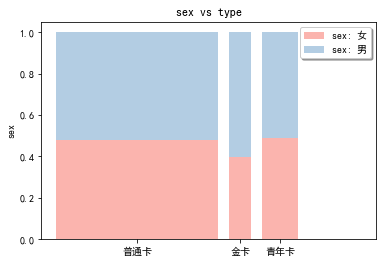

In [16]:
from stack2dim import *

stack2dim(card_t, 'type', 'sex')# 反映了各类卡的数量区别，和各种类型卡的性别占比

### 不同类型卡的持卡人在办卡时的平均年龄对比
 - 分类变量 + 连续变量

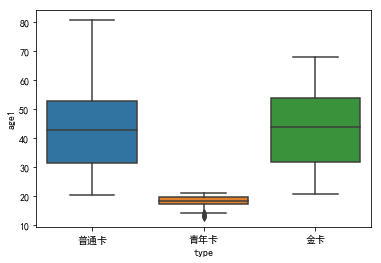

In [19]:
import seaborn as sns
import time

card_t['age'] = (pd.to_datetime(card_t['issued']) - pd.to_datetime(card_t['birth_date']))

card_t['age1'] = card_t['age'].map(lambda x: x.days/365)# 办卡日期 减去 出生日期
sns.boxplot(x='type', y='age1', data=card_t)

### 不同类型卡的持卡人在办卡前一年内的平均账户余额对比

In [20]:
trans = pd.read_csv('trans.csv', encoding='gbk')
trans.to_sql('trans', con)
card_t.to_sql('card_t', con)

C:\Users\cyb\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cyb\Anaconda3\envs\py3\lib\site-packages\pandas\io\sql.py:450: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  chunksize=chunksize, dtype=dtype)


In [22]:
car_sql = '''
select a.card_id,a.issued,a.type,c.type as t_type,c.amount,c.balance,c.date as t_date
  from card as a
  left join disp as b on a.disp_id=b.disp_id
  left join trans as c on b.account_id=c.account_id
  where b.type="所有者"
  order by a.card_id,c.date
'''

card_t2 = pd.read_sql(car_sql, con)

In [23]:
card_t2['issued']=pd.to_datetime(card_t2['issued'])
card_t2['t_date']=pd.to_datetime(card_t2['t_date'])

In [24]:
card_t2.head()

,card_id,issued,type,t_type,amount,balance,t_date
0,1,1998-10-16,金卡,贷,$900,$900,1996-11-24
1,1,1998-10-16,金卡,贷,$33975,$34875,1996-12-07
2,1,1998-10-16,金卡,借,"$6,600",$28275,1996-12-24
3,1,1998-10-16,金卡,贷,$30,$28305,1996-12-31
4,1,1998-10-16,金卡,贷,$22650,$50955,1997-01-07


In [26]:
import datetime

card_t2['balance2'] = card_t2['balance'].map(lambda x: int(''.join(x[1:].split(','))))
card_t2['amount2'] = card_t2['amount'].map(lambda x: int(''.join(x[1:].split(','))))

In [27]:
card_t2.head()

,card_id,issued,type,t_type,amount,balance,t_date,balance2,amount2
0,1,1998-10-16,金卡,贷,$900,$900,1996-11-24,900,900
1,1,1998-10-16,金卡,贷,$33975,$34875,1996-12-07,34875,33975
2,1,1998-10-16,金卡,借,"$6,600",$28275,1996-12-24,28275,6600
3,1,1998-10-16,金卡,贷,$30,$28305,1996-12-31,28305,30
4,1,1998-10-16,金卡,贷,$22650,$50955,1997-01-07,50955,22650


In [30]:
# 只取办卡前一年的信息，称为观察窗口，平均账户余额和平均收入
card_t3 = card_t2[card_t2.issued>card_t2.t_date][card_t2.issued<card_t2.t_date+datetime.timedelta(days=365)]

card_t4 = card_t3.groupby(['type', 'card_id'])['balance2'].agg([('avg_balance', 'mean')])
# 另一种写法
# card_t3["avg_balance"] = card_t3.groupby('card_id')['balance2'].mean()
card_t4.to_sql('card_t4', con)

C:\Users\cyb\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [35]:
card_t4.head()

avg_balance
type card_id              
普通卡  2        38898.610169
     4        54222.060976
     7        46888.702381
     9        55854.223881
     10       51387.500000

In [38]:
# 需要变成明细表的样式
card_t5 = card_t4.reset_index()

In [39]:
card_t5.head()

,type,card_id,avg_balance
0,普通卡,2,38898.610169
1,普通卡,4,54222.060976
2,普通卡,7,46888.702381
3,普通卡,9,55854.223881
4,普通卡,10,51387.500000


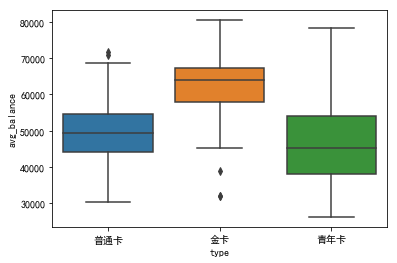

In [42]:
# 金卡平均账户余额较高
sns.boxplot(x='type', y='avg_balance', data=card_t5)

### 不同类型卡的持卡人在办卡前一年内的平均收入对比

In [43]:
card_t3.head()

,card_id,issued,type,t_type,amount,balance,t_date,balance2,amount2
47,1,1998-10-16,金卡,借,$13600,$57950,1997-10-20,57950,13600
48,1,1998-10-16,金卡,借,$15,$58197,1997-10-31,58197,15
49,1,1998-10-16,金卡,贷,$262,$58212,1997-10-31,58212,262
50,1,1998-10-16,金卡,借,"$4,880",$53317,1997-11-06,53317,4880
51,1,1998-10-16,金卡,贷,$22650,$75967,1997-11-07,75967,22650


In [47]:
type_dict = {'借':'out','贷':'income'}
card_t3['type1'] = card_t3.t_type.map(type_dict)
card_t6= card_t3.groupby(['type','card_id','type1'])[['amount2']].sum()
card_t6.to_sql('card_t6', con)

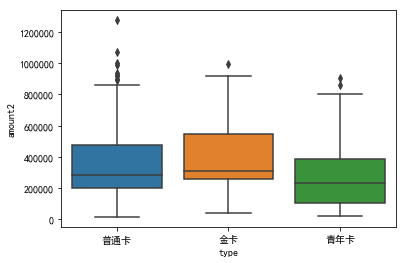

In [48]:
card_t7=card_t6.reset_index()
#card_t7=pd.read_sql('select * from card_t6', con)
card_t7.to_sql('card_t7', con)
card_t8=pd.read_sql('select * from card_t7 where type1="income"', con)# 收入
# In[13]:
sns.boxplot(x = 'type', y = 'amount2', data = card_t8)

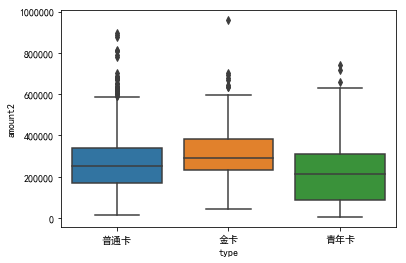

In [50]:
card_t9=pd.read_sql('select * from card_t7 where type1="out"', con)
sns.boxplot(x = 'type', y = 'amount2', data = card_t9)